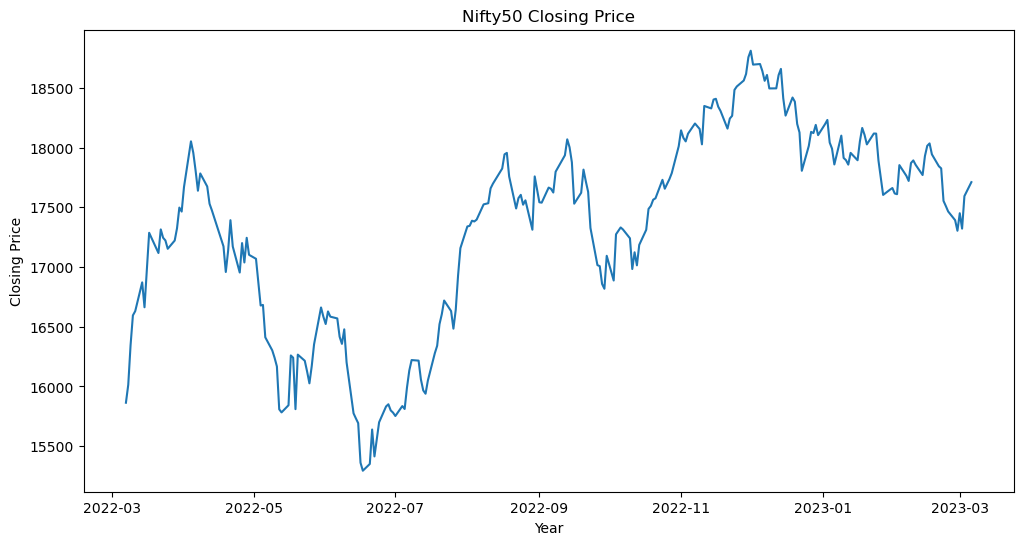

C:\Users\Shri.DESKTOP-3RITHQH\Anaconda (New)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shri.DESKTOP-3RITHQH\Anaconda (New)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shri.DESKTOP-3RITHQH\Anaconda (New)\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Shri.DESKTOP-3RITHQH\Anaconda (New)\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using

KeyError: 0

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime as dt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# load the data from the CSV file
df = pd.read_csv('nifty50.csv')

# convert Date column to datetime format and set it as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# extract closing price column
close_price = df['Close']

# plot the data
plt.figure(figsize=(12, 6))
plt.plot(close_price)
plt.title('Nifty50 Closing Price')
plt.xlabel('Year')
plt.ylabel('Closing Price')
plt.show()

# split data into training and testing sets
train_data = close_price[:len(close_price)-30]
test_data = close_price[len(close_price)-30:]

# fit ARMA model to training data
model = ARIMA(train_data, order=(2, 1, 2))
model_fit = model.fit()

# predict next day's closing price
next_day_pred = model_fit.forecast()[0][0]
print(f"Predicted closing price for next day: {next_day_pred:.2f}")

# fit ARMA model to training data
model = ARIMA(train_data, order=(2, 1, 2))
model_fit = model.fit()

# make predictions on test data
predictions = model_fit.forecast(steps=len(test_data))[0]

# calculate RMSE
rmse = np.sqrt(mean_squared_error(test_data, predictions))
print(f"Root Mean Squared Error: {rmse:.2f}")

# calculate profit/loss
buy_price = test_data.iloc[0]
sell_price = predictions[0]
profit_loss = sell_price - buy_price
print(f"Profit/Loss: {profit_loss:.2f}")

# function to predict next day's closing price using ARMA
def predict_price_ARMA(stock_symbol):
    # download the historical data from Yahoo Finance
    start_date = dt.datetime.now() - dt.timedelta(days=365)
    end_date = dt.datetime.now()
    stock_data = web.DataReader(stock_symbol, 'yahoo', start_date, end_date)

    # extract closing price column
    close_price = stock_data['Close']

    # fit ARMA model to entire data
    model = ARIMA(close_price, order=(2, 1, 2))
    model_fit = model.fit()

    # predict next day's closing price
    next_day_pred = model_fit.forecast()[0][0]
    return next_day_pred
stock_symbol = 'AAPL'
next_day_pred = predict_price_ARMA(stock_symbol)
print(f"Predicted closing price for {stock_symbol} next day: {next_day_pred:.2f}")